# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p>
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Ankita Kundra

EID: ak44675

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:


Gradient boosting is a machine learning technique for regression and classification problems that produce a prediction model in the form of an ensemble of weak prediction models. This technique builds a model in a stage-wise fashion and generalizes the model by allowing optimization of an arbitrary differentiable loss function. Gradient boosting basically combines weak learners into a single strong learner in an iterative fashion. As each weak learner is added, a new model is fitted to provide a more accurate estimate of the response variable. The new weak learners are maximally correlated with the negative gradient of the loss function, associated with the whole ensemble. The idea of gradient boosting is that you can combine a group of relatively weak prediction models to build a stronger prediction model. 

The difference between Gradient Boost and Ada Boost lies in what it does with the underfitted values of its predecessor. Contrary to AdaBoost, which tweaks the instance weights at every interaction, Gradient Boost method tries to fit the new predictor to the residual errors made by the previous predictor. Gradient boosting can create independent learning for each partition at every iteration. This is not the case in Adaboost where the entire dataset learn about the prediction of error at a given iteration step. Also the concept of sample weighing is more transparent in ada boost. In gradient boosting the concept is slightly elusive where the learning is performed on the error and not on the weighted residuals.

# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [83]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {} kernel'.format(kernel))
  plt.show()

## Answer:

## (a)

In [84]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
  svc = svm.SVC(C=C,kernel = kernel, gamma = gamma)
  svc.fit(X,y)
  return svc

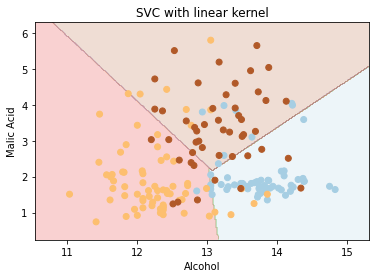

In [85]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## (b)

In [86]:
def train_model(X, y, kernel='rbf', C=1, gamma=0.5):
  svc = svm.SVC(C=C,kernel = kernel, gamma = gamma)
  svc.fit(X,y)
  return svc

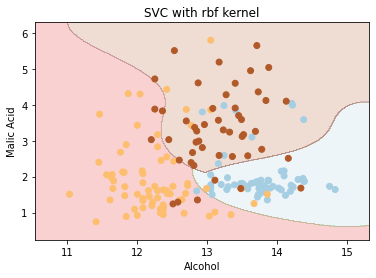

In [87]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf')

### Observation: 

It is observed that an RBF kernel is able to seperate the classes better than a linear kernel and it has lesser misclassification rate. This is because a non-linear kernel provides more flexibility in determining the decision boundaries and hence reduces the bias of the model.

## (c)

In [88]:
gamma_list = [0.5, 1, 10, 100]

For gamma =  0.5


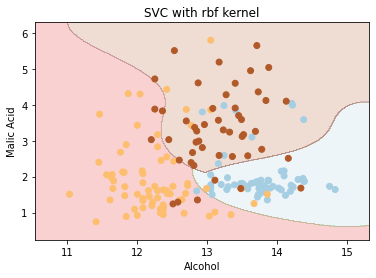

For gamma =  1


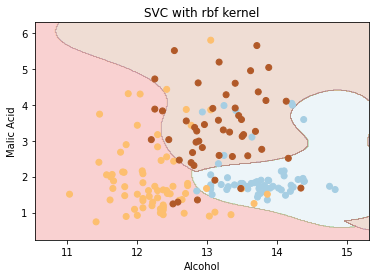

For gamma =  10


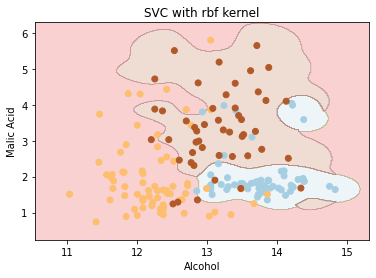

For gamma =  100


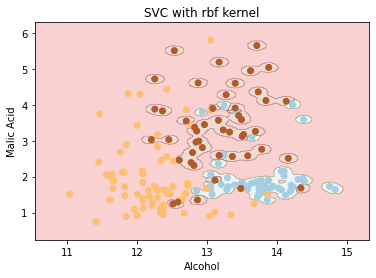

In [89]:
for gamma in gamma_list: 
    svc = train_model(X, y, kernel='rbf', C=1, gamma=gamma)
    print("For gamma = ", gamma)
    plot_model(X, y, svc, kernel='rbf')


### Observation: 

It is observed that as value of gamma increases, the performance of the model on the training dataset becomes better and better. But it also increases the problem of overfitting.

For lower values of gamma,0.05, one can observe that a few evident blue points are not able to be captured in the right region because of high influence of their red neighbour. If we reduce variance of influence or increase gamma then we can construct an appropriate boundary around those points.

Thus a striking balance need to be determined, post experimenting on the training dataset, for a mid range gamma value that does not leave points casually in other zone and even does not overpredict the zones.

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## Answer:

### (a)

In [3]:
#Fitting Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(X_train, y_train)

#Fitting Logistic Regression Classifier 
logreg = LogisticRegression(random_state=10, solver="newton-cg")
logreg.fit(X_train, y_train)

LogisticRegression(random_state=10, solver='newton-cg')

In [4]:
test_dt = dt_clf.predict(X_test)
test_logreg_pro = logreg.predict_proba(X_test)[:, 1]

test_logreg = logreg.predict(X_test)
test_dt_pro = dt_clf.predict_proba(X_test)[:, 1]

In [5]:
print("For Decision Tree Classifier, accuracy score is: ", round(accuracy_score(y_test, test_dt),4), "and ROC Score is: ", round(roc_auc_score(y_test, test_dt_pro),4))

print("For Logistic Regression Classifier, accuracy score is: ", round(accuracy_score(y_test, test_logreg),4), "and ROC Score is: ", round(roc_auc_score(y_test, test_logreg_pro),4))


For Decision Tree Classifier, accuracy score is:  0.9098 and ROC Score is:  0.904
For Logistic Regression Classifier, accuracy score is:  0.9315 and ROC Score is:  0.9735


### (b)

In [6]:
bgdt = BaggingClassifier(base_estimator = dt_clf, random_state=10, n_estimators=50)
bgdt.fit(X_train, y_train)

bglr = BaggingClassifier(base_estimator = logreg, random_state=10, n_estimators=50)
bglr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=10,
                                                    solver='newton-cg'),
                  n_estimators=50, random_state=10)

In [7]:
test_dt = bgdt.predict(X_test)
test_dt_pro = bgdt.predict_proba(X_test)[:, 1]

test_logreg_pro = bglr.predict_proba(X_test)[:, 1]
test_logreg = bglr.predict(X_test)

In [8]:
print("For Decision Tree Classifier, accuracy score is: ", round(accuracy_score(y_test, test_dt),4), "and ROC Score is: ", round(roc_auc_score(y_test, test_dt_pro),4))

print("For Logistic Regression Classifier, accuracy score is: ", round(accuracy_score(y_test, test_logreg),4), "and ROC Score is: ", round(roc_auc_score(y_test, test_logreg_pro),4))


For Decision Tree Classifier, accuracy score is:  0.9368 and ROC Score is:  0.9797
For Logistic Regression Classifier, accuracy score is:  0.9342 and ROC Score is:  0.9755


When compared to non ensemble methods, the decision tree improved greatly while the logistic regression mostly remained the same with same slight improvements. This is due to the fact that ensemble relies on model variability or ambiguity in order to obtain a higher accuracy. Logistic regression models are going to be very similar while the decision tree model can vary a lot. As a result, the decision tree model benefits from the ensemble more than the logistic regression.

### (c)

In [9]:
param = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy']}


rfc= GridSearchCV(RandomForestClassifier(random_state=42),param)
rfc.fit(X_train, y_train)
rfc.best_params_

{'criterion': 'gini', 'n_estimators': 500}

In [10]:
rfc_best = RandomForestClassifier(random_state=42, criterion= rfc.best_params_['criterion'], n_estimators= rfc.best_params_['n_estimators'])

rfc_best.fit(X_train, y_train)
test_rfc_pro = rfc_best.predict_proba(X_test)[:, 1]
test_rfc = rfc_best.predict(X_test)


In [11]:
print("For Random Forest Classifier, accuracy score is: ", round(accuracy_score(y_test, test_rfc),4), "and ROC Score is: ", round(roc_auc_score(y_test, test_rfc_pro),4))



For Random Forest Classifier, accuracy score is:  0.9552 and ROC Score is:  0.9891


### (d)

### Gradient Boosting Classifier

In [12]:
param_gb = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0]}


gb= GridSearchCV(GradientBoostingClassifier(random_state=42),param_gb)
gb.fit(X_train, y_train)
gb.best_params_


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}

In [13]:
gb_best = GradientBoostingClassifier(random_state=42, learning_rate= gb.best_params_['learning_rate'], n_estimators= gb.best_params_['n_estimators'], max_depth= gb.best_params_['max_depth'], subsample = gb.best_params_['subsample'])

gb_best.fit(X_train, y_train)
test_gb_pro = gb_best.predict_proba(X_test)[:, 1]
test_gb = gb_best.predict(X_test)



In [14]:
print("For Gradient Boosting Classifier, accuracy score is: ", round(accuracy_score(y_test, test_gb),4), "and ROC Score is: ", round(roc_auc_score(y_test, test_gb_pro),4))


For Gradient Boosting Classifier, accuracy score is:  0.9552 and ROC Score is:  0.9889


### AdaBoost Classifier

In [15]:
param_ab = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5]}


ab= GridSearchCV(AdaBoostClassifier(random_state=42),param_ab)
ab.fit(X_train, y_train)
ab.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [16]:
ab_best = AdaBoostClassifier(random_state=42, learning_rate= ab.best_params_['learning_rate'], n_estimators= ab.best_params_['n_estimators'])

ab_best.fit(X_train, y_train)
test_ab_pro = ab_best.predict_proba(X_test)[:, 1]
test_ab = ab_best.predict(X_test)

In [17]:
print("For AdaBoost Classifier, accuracy score is: ", round(accuracy_score(y_test, test_ab),4), "and ROC Score is: ", round(roc_auc_score(y_test, test_ab_pro),4))


For AdaBoost Classifier, accuracy score is:  0.9513 and ROC Score is:  0.9859


### (e)

In [18]:
n_estimators_list = [10, 100, 500]
models = ['RandomForest','GradientBoosting','AdaBoost']

as_df = pd.DataFrame(columns = models,index = n_estimators_list)
roc_df = pd.DataFrame(columns = models,index = n_estimators_list)

for n_estimators in n_estimators_list:
    rfc_plot = RandomForestClassifier(random_state=42, criterion= rfc.best_params_['criterion'], n_estimators= n_estimators)
    rfc_plot.fit(X_train, y_train)
    as_df.loc[n_estimators,'RandomForest'] = accuracy_score(y_test, rfc_plot.predict(X_test))
    roc_df.loc[n_estimators,'RandomForest'] = roc_auc_score(y_test, rfc_plot.predict_proba(X_test)[:, 1])
    
    gb_plot = GradientBoostingClassifier(random_state=42, learning_rate= gb.best_params_['learning_rate'], n_estimators= n_estimators, max_depth= gb.best_params_['max_depth'], subsample = gb.best_params_['subsample'])
    gb_plot.fit(X_train, y_train)
    as_df.loc[n_estimators,'GradientBoosting'] = accuracy_score(y_test, gb_plot.predict(X_test))
    roc_df.loc[n_estimators,'GradientBoosting'] = roc_auc_score(y_test, gb_plot.predict_proba(X_test)[:, 1])
    
    ab_plot = AdaBoostClassifier(random_state=42, learning_rate= ab.best_params_['learning_rate'], n_estimators= n_estimators)
    ab_plot.fit(X_train, y_train)  
    as_df.loc[n_estimators,'AdaBoost'] = accuracy_score(y_test, ab_plot.predict(X_test))
    roc_df.loc[n_estimators,'AdaBoost'] = roc_auc_score(y_test, ab_plot.predict_proba(X_test)[:, 1])
     
    
        

In [22]:
print(as_df)
print(roc_df)

    RandomForest GradientBoosting  AdaBoost
10      0.945359         0.895326  0.844635
100      0.95655         0.950625  0.940092
500     0.955234         0.955234  0.951284
    RandomForest GradientBoosting  AdaBoost
10      0.981291         0.954392  0.936802
100      0.98833         0.987073  0.983828
500     0.989123         0.988909  0.985884


For Accuracy, the plot is:


<AxesSubplot:>

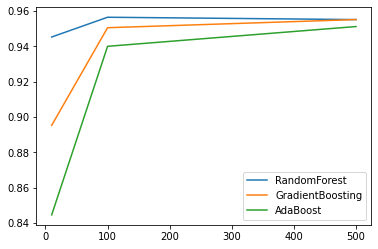

In [23]:
print("For Accuracy, the plot is:")
as_df.plot()

For ROC, the plot is:


<AxesSubplot:>

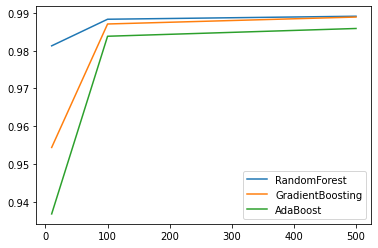

In [24]:
print("For ROC, the plot is:")
roc_df.plot()